# Plot the Figure \<relaxation_nutrients\>

# Environment

This notebook was run in a conda virtual environment. The following commands will automatically create the environment and launch the Jupyter notebook:

```
cd <my_path>/gud_groups
conda env create -f binder/environment.yml
cd <my_path>/gud_groups/output/run_20230707_0000_EXP0_translucent_snow
conda activate gud_groups
jupyter notebook
```

Once the environment gud_groups is created, the Jupyter notebook can be launched simply with:

```
cd <my_path>/gud_groups/output/run_20230707_0000_EXP0_translucent_snow
conda activate gud_groups
jupyter notebook
```

# First, load libraries

In [1]:
import matplotlib.pyplot as plt
import netcdf_tools
import numpy as np
import pandas as pd

In [2]:
plt.close("all")

# Grid

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

It corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [3]:
gridfile='grid.t001.nc';
drF=netcdf_tools.read_netcdf(gridfile,'drF')

RC is the r coordiante of cell center (in m).
We switch sign to have positive depths.

In [4]:
RC=-netcdf_tools.read_netcdf(gridfile,'RC')

In [5]:
RC

masked_array(data=[0.5061625, 1.5333449999999997, 2.5948719999999996,
                   3.7013264999999995, 4.866235, 6.106664499999999,
                   7.443784999999999, 8.903281, 10.5154235,
                   12.314566000000001, 14.337813500000001, 16.6226945,
                   19.203892000000003, 22.109410500000003, 25.356929,
                   28.9512475, 32.883559500000004, 37.1327755, 41.6684945,
                   46.454799, 51.453981, 56.6295605, 61.9483055,
                   67.381287, 72.9041905, 78.4971245, 84.1441395,
                   89.832647, 95.5528315, 101.2971055, 107.0596445,
                   112.836004, 118.622804, 124.417478, 130.2180915,
                   136.02317200000002, 141.8316135, 147.6425875,
                   153.4554685, 159.269784, 165.08516799999998,
                   170.9013685, 176.718179, 182.5354395,
                   188.35304349999998, 194.17090699999997,
                   199.98896899999997, 205.80717599999997,
               

RF is the r coordinate of cell interface (in m). We switch sign to have positive depths.

RF=-netcdf_tools.read_netcdf(gridfile,'RF')

# Observations

In [7]:
inNO3=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.bin',
                  dtype='>f')
inPO4=np.fromfile('1D_BB_PO4_GE_spring.delZ1016mm.32bits.bin',
                  dtype='>f')
inSiOH4=np.fromfile('1D_BB_Si_GE_spring.delZ1016mm.32bits.bin',
                    dtype='>f')

# EXP-1.3: differing nitrate before bloom initation

In [8]:
no3t0_25=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.0.25.bin',
                     dtype='>f')
no3t0_50=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.0.50.bin',
                     dtype='>f')
no3t1_00=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.1.00.bin',
                     dtype='>f')
no3t2_00=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.2.00.bin',
                     dtype='>f')
no3t4_00=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.4.00.bin',
                     dtype='>f')

# Plot

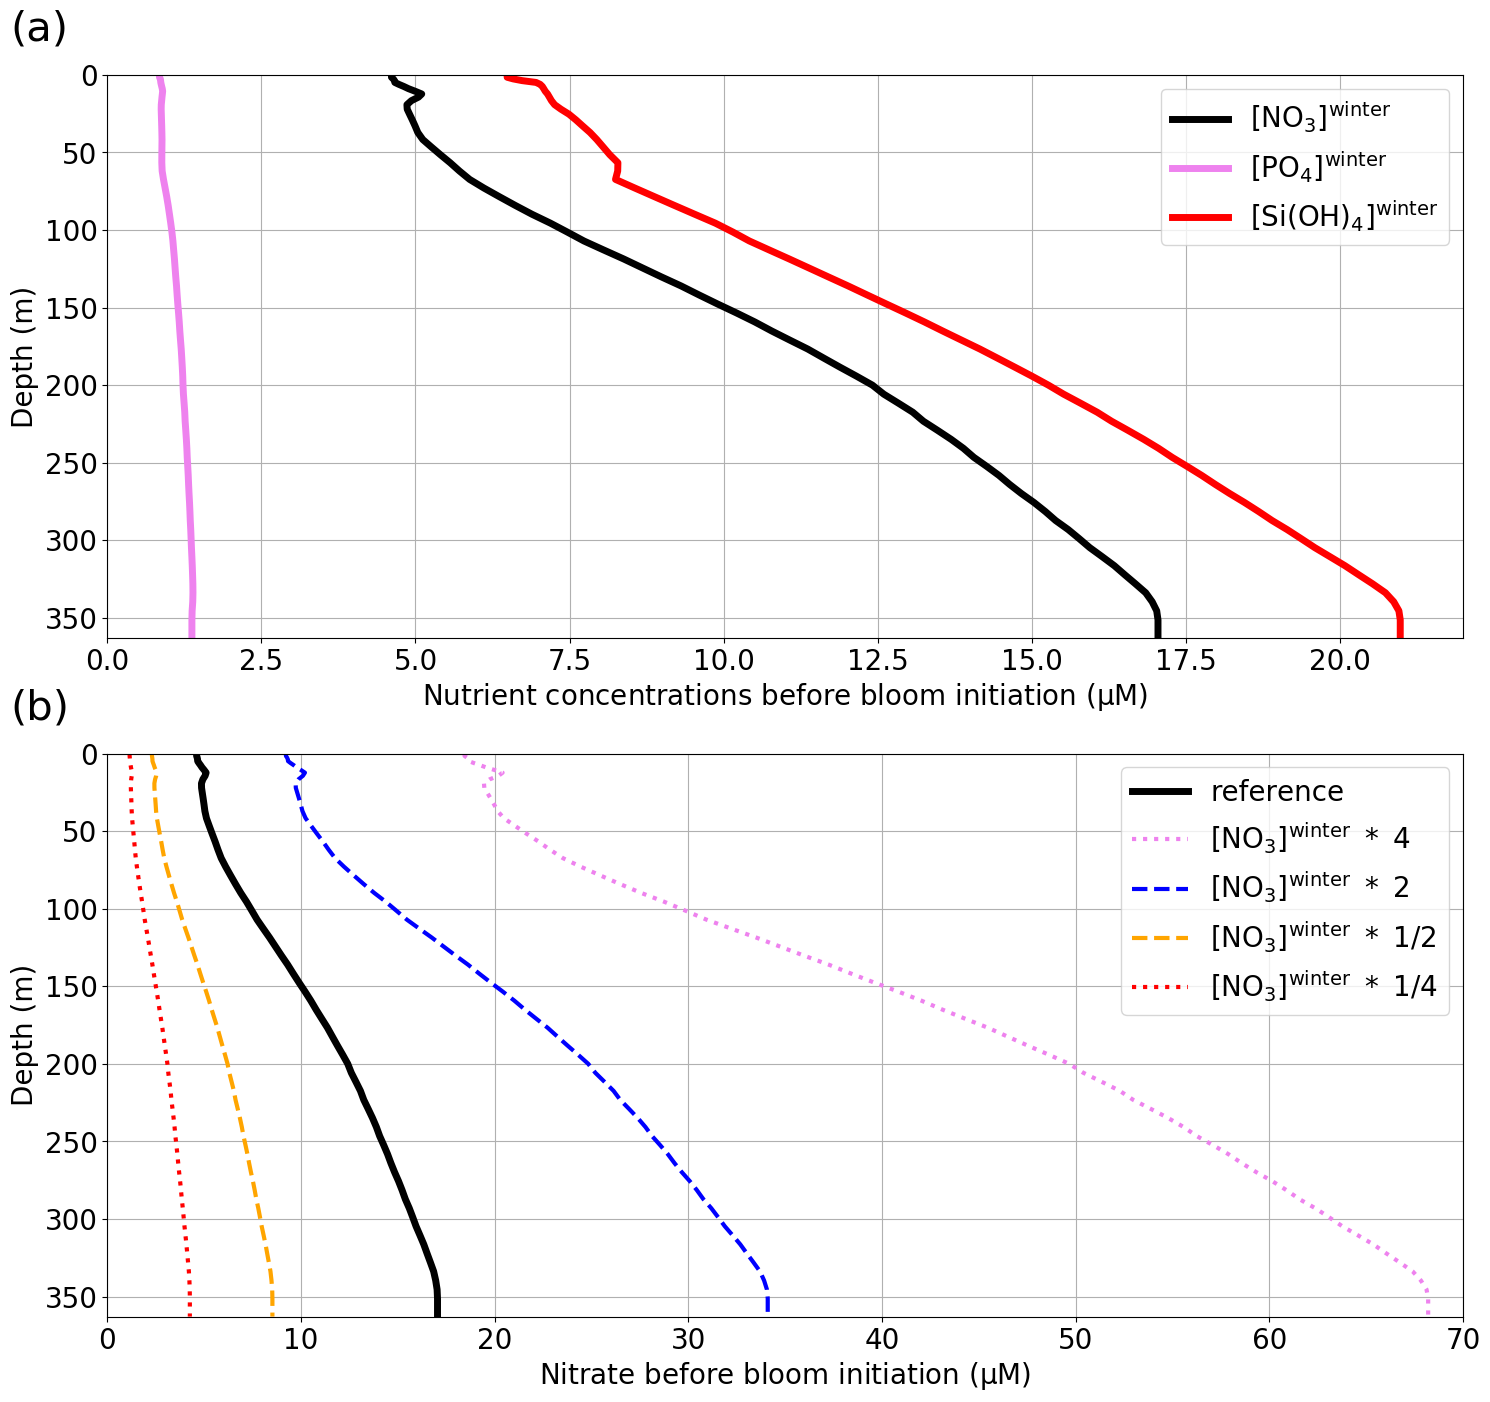

In [9]:
def make_plots(axs):
    box=dict(pad=5,alpha=0)
    
    # --- OBSERVATIONS
    ax=axs[0]
    h1=ax.plot(inNO3,RC,
              color='black',linewidth=5,
              label='$\mathrm{{ [NO_3]^{{winter}} }}$')
    ax.set_xlabel('Nutrient concentrations before bloom initiation '
                  '($\mathrm{ \mu M }$)')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0,22)
    ax.set_ylim(0,363)
    ax.invert_yaxis()
    h2=ax.plot(inPO4,RC,
              color='violet',linewidth=5,
              label='$\mathrm{{ [PO_4]^{{winter}} }}$')
    h3=ax.plot(inSiOH4,RC,
              color='red',linewidth=5,
              label='$\mathrm{{ [Si{(OH)}_4]^{{winter}} }}$')
    ax.legend()
    ax.grid(True)
    plt.text(-0.05,1.08,'(a)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    
    # --- EXP-1.3
    ax=axs[1]
    h1=ax.plot(no3t1_00,RC,
              '-',color='black',linewidth=5,
              label='reference')
    ax.set_xlabel('Nitrate before bloom initiation '
                  '($\mathrm{ \mu M }$)')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0,70)
    ax.set_ylim(0,363)
    ax.invert_yaxis()
    h1=ax.plot(no3t4_00,RC,
              ':',color='violet',
              label='$\mathrm{ {[NO_3]}^{winter}\ *\ 4 }$')
    h1=ax.plot(no3t2_00,RC,
              '--',color='blue',
              label='$\mathrm{ {[NO_3]}^{winter}\ *\ 2 }$')
    h1=ax.plot(no3t0_50,RC,
              '--',color='orange',
              label='$\mathrm{ {[NO_3]}^{winter}\ *\ 1/2 }$')
    h1=ax.plot(no3t0_25,RC,
              ':',color='red',
              label='$\mathrm{ {[NO_3]}^{winter}\ *\ 1/4 }$')
    ax.legend()
    ax.grid(True)
    plt.text(-0.05,1.08,'(b)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    

    # --- POSITION
    axs[0].set_position( [0.07,0.55  ,0.91,0.39])
    axs[1].set_position( [0.07,0.08  ,0.91,0.39])

with plt.style.context('relaxation_nutrients.mplstyle'):
    # Plot
    fig,axs=plt.subplots(2,1,figsize=(14.90,14.44))
    make_plots(axs)

    # --- SAVE
    outfile='relaxation_nutrients.png'
    plt.savefig(outfile)

Figure \<relaxation_nutrients\>.
Nutrient concentrations between January 1 and May 15.
The solid lines are the $in\ situ$ nutrient concentrations at the
Qikiqtarjuaq sea ice camps between mid-April and the end of May in 2015
and 2016.
They are also the nutrient concentrations between January 1 to May 15
for the reference simulation (EXP-0).
(a) Nitrate ($\mathrm{ {[NO_3]}^{winter} }$, black),
silicic acid ($\mathrm{ {[Si{(OH)}_4]}^{winter} }$, red)
and phosphate ($\mathrm{ {[NO_3]}^{winter} }$, purple)
concentrations between January 1 and May 15.
(b) Nitrate concentration ($\mathrm{ {[NO_3]}^{winter} }$, black)
between January 1 and May 15.
The dotted and dashed lines are the nitrate concentrations between
January 1 and May 15 for the sensitivity experiment EXP-3.
Note the different x-axis between (a) and (b).